In [116]:
#Importing Libraries 
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import xlrd
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from seaborn import pairplot
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import kendalltau
!pip install varname
import os 
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
#Saving data link
cabdata_link = 'https://raw.githubusercontent.com/khalsz/Data-Glacier/main/Cab_Data.csv'
citydata_link = 'https://raw.githubusercontent.com/khalsz/Data-Glacier/main/City.csv'
customerdata_link = 'https://raw.githubusercontent.com/khalsz/Data-Glacier/main/Customer_ID.csv'
tranx_link = 'https://raw.githubusercontent.com/khalsz/Data-Glacier/main/Transaction_ID.csv'


In [118]:
#loading data
cabdata = pd.read_csv(cabdata_link)
citydata = pd.read_csv(citydata_link)
customerdata = pd.read_csv(customerdata_link)
tranxdata = pd.read_csv(tranx_link)

##Checking the data info

In [119]:
def data_dim(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  dim = data.shape
  print('{} has {} entries and {} variables'.format(name, dim[0], dim[1]))

In [120]:
datas = [cabdata, citydata, customerdata, tranxdata]

for x in datas: 
  data_dim(x)

cabdata has 359392 entries and 7 variables
citydata has 20 entries and 3 variables
customerdata has 49171 entries and 4 variables
tranxdata has 440098 entries and 3 variables


In [121]:
def data_desc(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  desc = data.describe()
  print('This is {} info:'.format(name))
  print(desc, '\n')

In [122]:
for x in datas: 
  data_desc(x)

This is cabdata info:
       Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000   

This is citydata info:
               City   Population      Users
count            20           20         20
unique           2

In [123]:
def data_head(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  data_h = data.head
  print('THIS IS {} FIRST 5 ROws:'.format(name))
  print(data_h, '\n')

In [124]:
for x in datas: 
  data_head(x)

THIS IS cabdata FIRST 5 ROws:
<bound method NDFrame.head of         Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1      

In [125]:
def data_info(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  
  print('THIS IS {} INFO:'.format(name))
  data_in = data.info()
  print(data_in, '\n')

In [126]:
for x in datas: 
  data_info(x)

THIS IS cabdata INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None 

THIS IS citydata INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None 

THIS IS

In [127]:
def data_NA(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  data_na = data.isnull().sum().sum()
  print('THERE ARE {} NAs in {}'.format(data_na, name))
  

In [128]:
for x in datas: 
  data_NA(x)

THERE ARE 0 NAs in cabdata
THERE ARE 0 NAs in citydata
THERE ARE 0 NAs in customerdata
THERE ARE 0 NAs in tranxdata


In [129]:
def dup(data): 
  name = [x for x in globals() if globals()[x] is data][0]
  NO_Dupl = data.duplicated().sum()
  print('There are {} duplicate in {}'.format(NO_Dupl, name))

In [130]:
for x in datas: 
  dup(x)

There are 0 duplicate in cabdata
There are 0 duplicate in citydata
There are 0 duplicate in customerdata
There are 0 duplicate in tranxdata


### Replacing ',' with '' in Population and User variables in City data 

In [131]:
citydata['Population'] = citydata['Population'].str.replace(',', '').astype(int)
citydata['Users'] = citydata['Users'].str.replace(',', '').astype(int)

### COnverting date column in Cab data to Year Month and Day format

In [132]:
cabdata.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [133]:
cabdata.loc[:, 'Date of Travel'] = cabdata.loc[:, 'Date of Travel'].map(lambda x: datetime(*xlrd.xldate_as_tuple(x, 0)))


In [134]:
cabdata['Date of Travel'].dtypes

dtype('<M8[ns]')

In [135]:
cabdata['Year'] = cabdata['Date of Travel'].dt.year
cabdata['Month'] = cabdata['Date of Travel'].dt.month

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

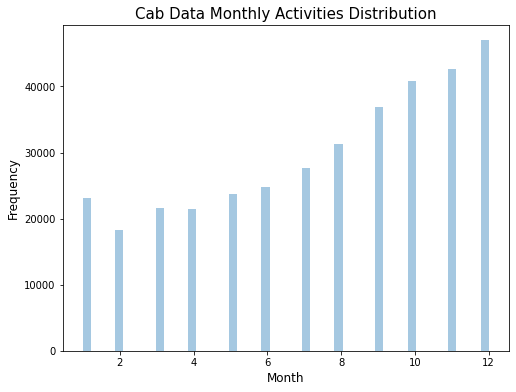

In [136]:
plt.figure(figsize = (8,6))
sns.distplot(cabdata['Month'], kde= False)
plt.title('Cab Data Monthly Activities Distribution', size = 15)
plt.xlabel("Month", size = 12)
plt.ylabel('Frequency', size = 12)

Text(0, 0.5, 'Frequency')

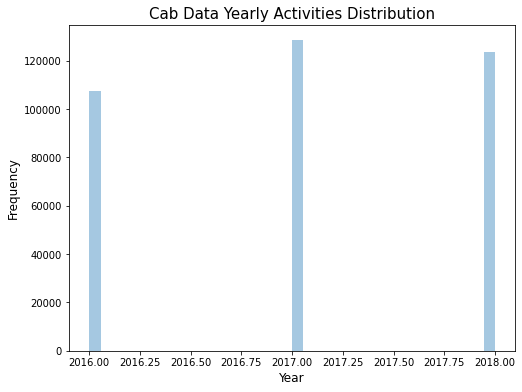

In [137]:
plt.figure(figsize = (8,6))
sns.distplot(cabdata['Year'], kde= False)
plt.title('Cab Data Yearly Activities Distribution', size = 15)
plt.xlabel("Year", size = 12)
plt.ylabel('Frequency', size = 12)

### Replacing ' ' in data frame column names with '_'

In [138]:
cabdata.columns = [c.replace(' ', '_') for c in cabdata.columns] 
customerdata.columns = [c.replace(' ', '_') for c in customerdata.columns] 
tranxdata.columns = [c.replace(' ', '_') for c in tranxdata.columns] 

###Merging Cab data and Transaction data 

In [139]:
merged_data_df = pd.merge(cabdata,  tranxdata, how = 'outer', on = 'Transaction_ID')
merged_data_df['Profit'] = merged_data_df['Price_Charged'] - merged_data_df['Cost_of_Trip']
merged_data_df['Price_Ch_PerKM'] = merged_data_df['Price_Charged']/ merged_data_df['KM_Travelled']
merged_data_df

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode,Profit,Price_Ch_PerKM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016.0,1.0,29290,Card,57.315,12.182266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016.0,1.0,27703,Card,23.666,12.526904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016.0,1.0,28712,Cash,27.568,13.849558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016.0,1.0,28020,Cash,25.798,11.377751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016.0,1.0,27182,Card,16.844,13.129439
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10440078,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51612,Cash,NaN,NaN
440094,10440091,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53963,Card,NaN,NaN
440095,10440102,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52526,Cash,NaN,NaN
440096,10440103,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53171,Card,NaN,NaN


###Merging Customer data with the merged data

In [140]:
merged_data_df2 = pd.merge(merged_data_df, customerdata, how = 'outer', on = 'Customer_ID')
merged_data_df2.rename(columns = {'Income_(USD/Month)': 'Income'}, inplace = True)
merged_data_df2

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Year,Month,Customer_ID,Payment_Mode,Profit,Price_Ch_PerKM,Gender,Age,Income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016.0,1.0,29290,Card,57.3150,12.182266,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018.0,7.0,29290,Cash,281.2772,22.859870,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018.0,11.0,29290,Card,194.6480,18.614571,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016.0,1.0,27703,Card,23.6660,12.526904,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018.0,4.0,27703,Card,253.9808,19.821330,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439406,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23382,Card,NaN,NaN,Female,51,18919
440094,10439409,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21420,Card,NaN,NaN,Female,18,4531
440095,10439413,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49888,Card,NaN,NaN,Male,23,3226
440096,10439418,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46456,Cash,NaN,NaN,Male,20,30662


In [141]:
datadf = pd.merge(merged_data_df2, citydata)

In [142]:
datadf.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Customer_ID',
       'Payment_Mode', 'Profit', 'Price_Ch_PerKM', 'Gender', 'Age', 'Income',
       'Population', 'Users'],
      dtype='object')

There is atleast one relationship between the different dataframe supplied for this project. The Cabdata from the companies has transaction ID which is unique and the transaction data also has the same. After merging the Cabdata and the transaction data, the customer data has the customer ID column which can also be found in the merged data. To merge teh city data with the remaining, the city columns was used which can be found in the two dataset. This helped removed some uncessary rows in the existing dataframe. 

Removing Outliers 

In [143]:
from scipy import stats
datadf2 = datadf.loc[:, ~datadf.columns.isin (['Date_of_Travel', 'Year'])]
datadf2 = datadf2.select_dtypes(include = ['int64', 'float64'])

In [144]:
datadf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction_ID  359392 non-null  int64  
 1   KM_Travelled    359392 non-null  float64
 2   Price_Charged   359392 non-null  float64
 3   Cost_of_Trip    359392 non-null  float64
 4   Month           359392 non-null  float64
 5   Customer_ID     359392 non-null  int64  
 6   Profit          359392 non-null  float64
 7   Price_Ch_PerKM  359392 non-null  float64
 8   Age             359392 non-null  int64  
 9   Income          359392 non-null  int64  
 10  Population      359392 non-null  int64  
 11  Users           359392 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 35.6 MB


In [145]:
from scipy import stats
rm_out = datadf2[(np.abs(stats.zscore(datadf2)) < 3).all(axis=1)]

In [146]:
datadf = datadf.loc[rm_out.index, :]

In [147]:
datadf.isnull().sum().sum()

0

In [148]:
#Checking duplicate rows
datadf.duplicated().sum()

0

In [149]:
datadf.dtypes

Transaction_ID             int64
Date_of_Travel    datetime64[ns]
Company                   object
City                      object
KM_Travelled             float64
Price_Charged            float64
Cost_of_Trip             float64
Year                     float64
Month                    float64
Customer_ID                int64
Payment_Mode              object
Profit                   float64
Price_Ch_PerKM           float64
Gender                    object
Age                        int64
Income                     int64
Population                 int64
Users                      int64
dtype: object

In [150]:
datadf.shape

(350767, 18)

In [151]:
datadf.columns


Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Customer_ID',
       'Payment_Mode', 'Profit', 'Price_Ch_PerKM', 'Gender', 'Age', 'Income',
       'Population', 'Users'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Profit Margin')

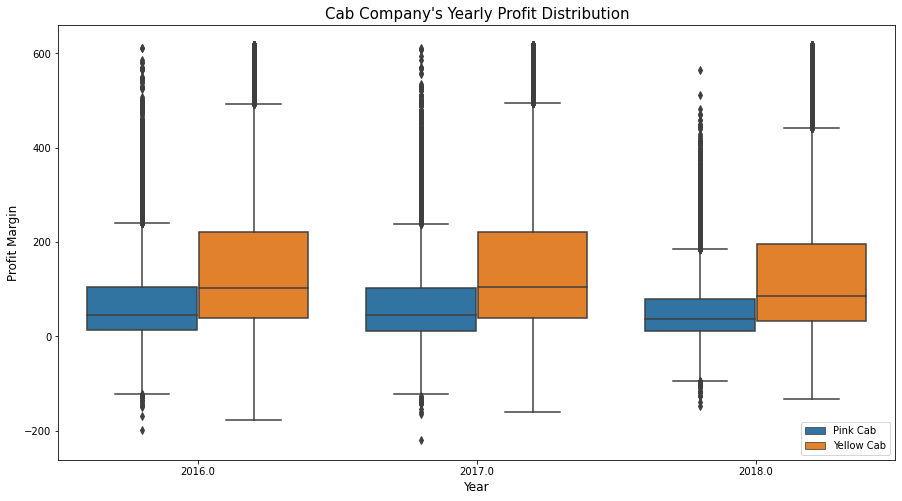

In [152]:
plt.figure(figsize = (15, 8))
sns.boxplot('Year', 'Profit', data = datadf, hue = 'Company')
plt.title( "Cab Company's Yearly Profit Distribution", size = 15)
plt.legend(loc = 'best')
plt.xlabel("Year", size = 12)
plt.ylabel('Profit Margin', size = 12)

In [153]:
print('Both Cab Company Mean Yearly Profit Distribution :')
datadf.groupby(['Year', 'Company'])['Profit'].mean()

Both Cab Company Mean Yearly Profit Distribution :


Year    Company   
2016.0  Pink Cab       68.099587
        Yellow Cab    148.697981
2017.0  Pink Cab       66.725940
        Yellow Cab    148.214705
2018.0  Pink Cab       53.021182
        Yellow Cab    134.137875
Name: Profit, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Profit Margin')

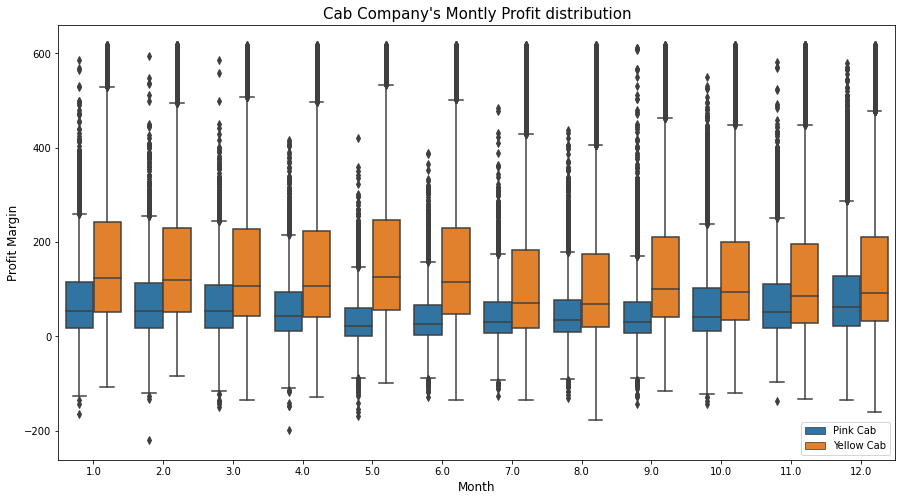

In [154]:
plt.figure(figsize = (15, 8))
sns.boxplot('Month', 'Profit', data = datadf, hue = 'Company')
plt.title( "Cab Company's Montly Profit distribution", size = 15)
plt.legend(loc = 'best')
plt.xlabel("Month", size = 12)
plt.ylabel('Profit Margin', size = 12)

In [155]:
print('Both Cab Company Mean Monthly Profit Distribution :')
datadf.groupby(['Month', 'Company'])['Profit'].mean()

Both Cab Company Mean Monthly Profit Distribution :


Month  Company   
1.0    Pink Cab       76.736129
       Yellow Cab    164.446415
2.0    Pink Cab       74.678906
       Yellow Cab    162.709200
3.0    Pink Cab       70.693903
       Yellow Cab    154.705152
4.0    Pink Cab       60.205265
       Yellow Cab    152.759340
5.0    Pink Cab       33.843282
       Yellow Cab    170.399887
6.0    Pink Cab       39.597623
       Yellow Cab    158.221971
7.0    Pink Cab       45.809575
       Yellow Cab    123.710053
8.0    Pink Cab       50.168148
       Yellow Cab    117.731415
9.0    Pink Cab       49.177686
       Yellow Cab    144.427968
10.0   Pink Cab       65.850706
       Yellow Cab    133.996014
11.0   Pink Cab       73.632546
       Yellow Cab    133.449629
12.0   Pink Cab       88.865029
       Yellow Cab    140.120795
Name: Profit, dtype: float64

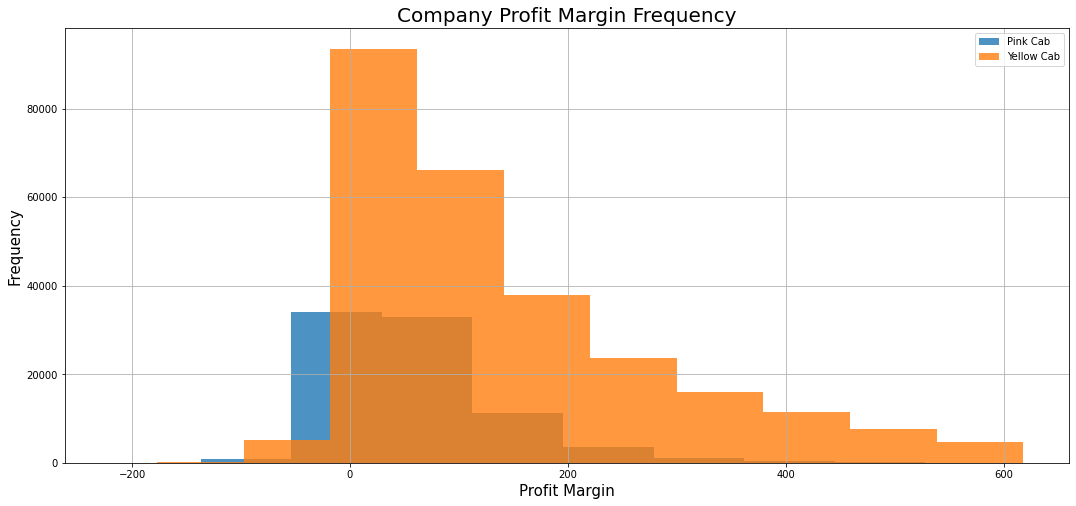

In [156]:
plt.figure(figsize = (18,8))
datadf.groupby('Company')['Profit'].hist(alpha = 0.8)
plt.xlabel("Profit Margin", size = 15)
plt.ylabel('Frequency', size = 15)
plt.title("Company Profit Margin Frequency", size = 20)
plt.legend(['Pink Cab', 'Yellow Cab'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Cost of Trip')

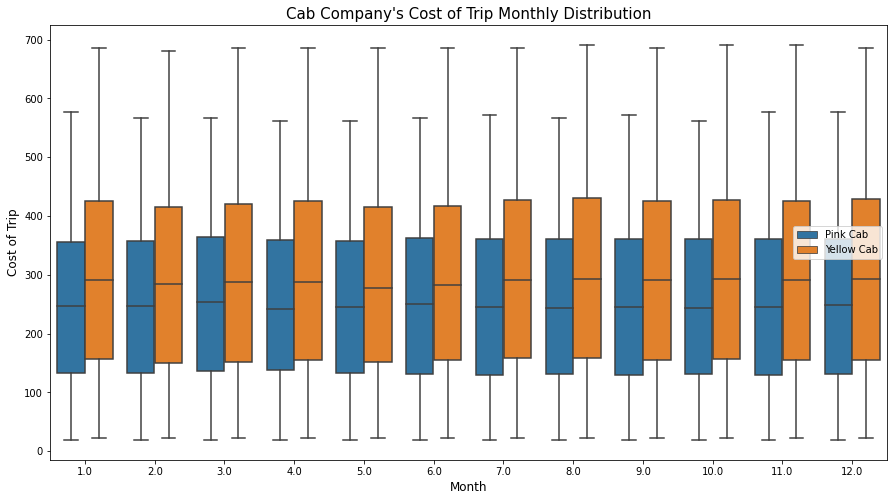

In [157]:
plt.figure(figsize = (15, 8))
sns.boxplot('Month', 'Cost_of_Trip', data = datadf, hue = 'Company')
plt.title( "Cab Company's Cost of Trip Monthly Distribution", size = 15)
plt.legend(loc = 'best')
plt.xlabel("Month", size = 12)
plt.ylabel('Cost of Trip', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Cost of Trip')

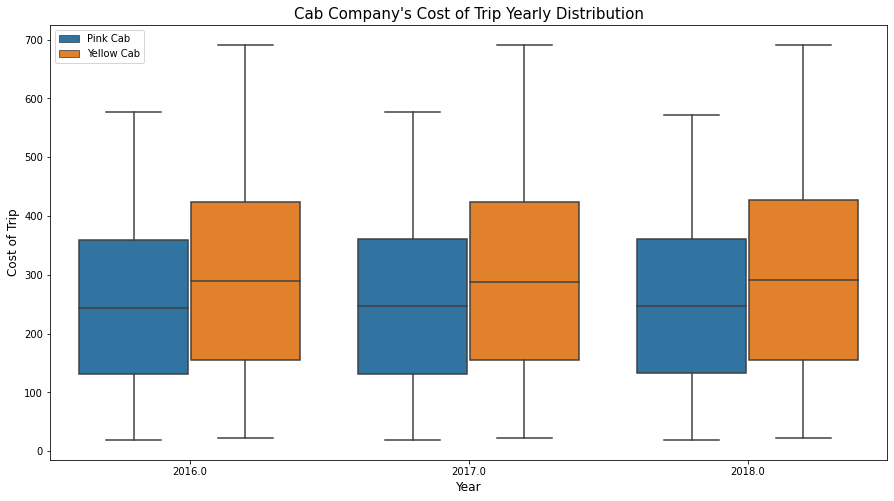

In [158]:
plt.figure(figsize = (15, 8))
sns.boxplot('Year', 'Cost_of_Trip', data = datadf, hue = 'Company')
plt.title( "Cab Company's Cost of Trip Yearly Distribution", size = 15)
plt.legend(loc = 'best')
plt.xlabel("Year", size = 12)
plt.ylabel('Cost of Trip', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price Charged')

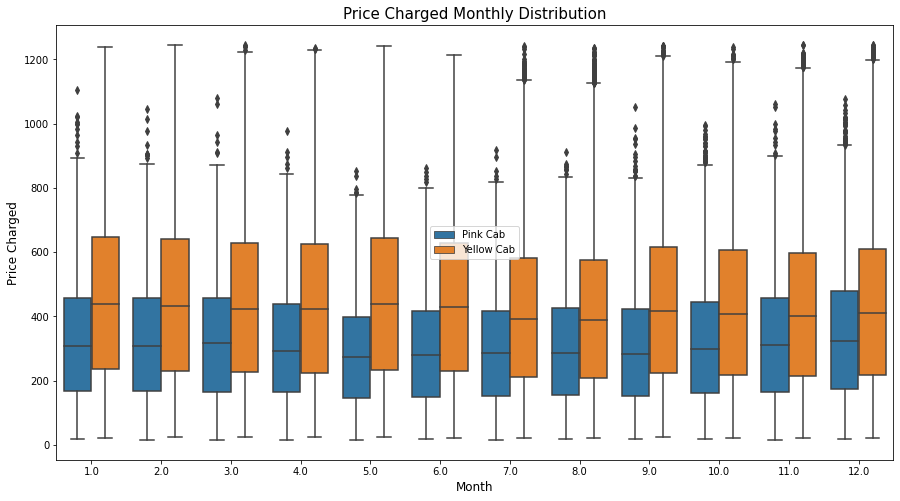

In [159]:
plt.figure(figsize = (15, 8))
sns.boxplot('Month', 'Price_Charged', data = datadf, hue = 'Company')
plt.title( 'Price Charged Monthly Distribution', size = 15)
plt.legend(loc = 'best')
plt.xlabel("Month", size = 12)
plt.ylabel('Price Charged', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price Charged')

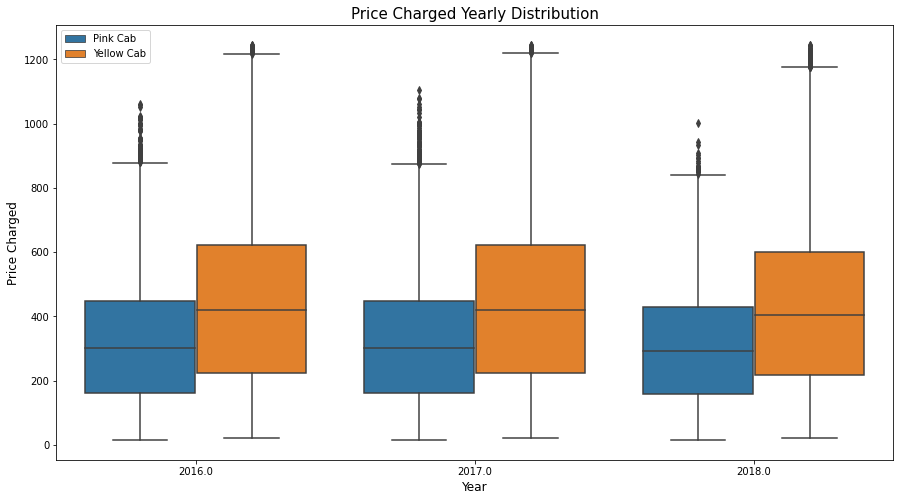

In [160]:
plt.figure(figsize = (15, 8))
sns.boxplot('Year', 'Price_Charged', data = datadf, hue = 'Company')
plt.title( 'Price Charged Yearly Distribution', size = 15)
plt.legend(loc = 'best')
plt.xlabel("Year", size = 12)
plt.ylabel('Price Charged', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price Charged Per KM')

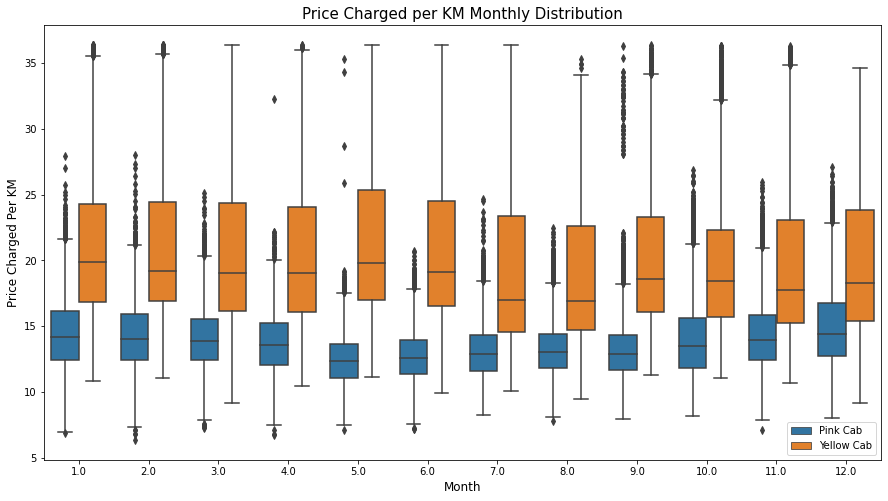

In [161]:
plt.figure(figsize = (15, 8))
sns.boxplot('Month', 'Price_Ch_PerKM', data = datadf, hue = 'Company')
plt.title( 'Price Charged per KM Monthly Distribution', size = 15)
plt.legend(loc = 'best')
plt.xlabel("Month", size = 12)
plt.ylabel('Price Charged Per KM', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price Charged Per KM')

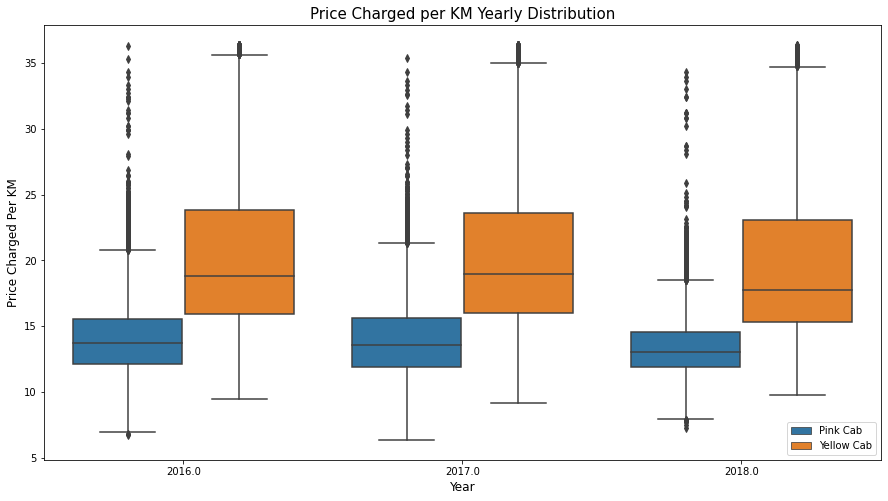

In [162]:
plt.figure(figsize = (15, 8))
sns.boxplot('Year', 'Price_Ch_PerKM', data = datadf, hue = 'Company')
plt.title( 'Price Charged per KM Yearly Distribution', size = 15)
plt.legend(loc = 'best')
plt.xlabel("Year", size = 12)
plt.ylabel('Price Charged Per KM', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Price Charged Per KM')

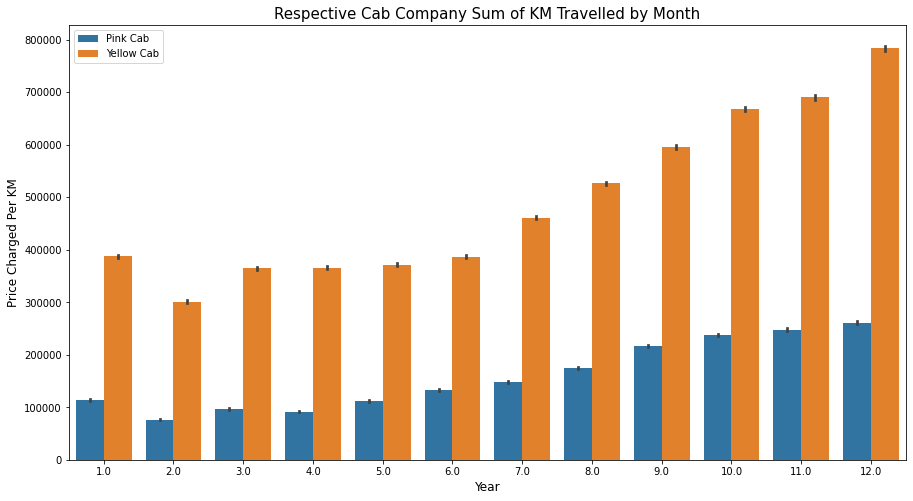

In [163]:
plt.figure(figsize = (15, 8))
sns.barplot('Month', 'KM_Travelled', hue = 'Company', data =datadf, estimator = np.sum)
plt.title( 'Respective Cab Company Sum of KM Travelled by Month', size = 15)
plt.legend(loc = 'best')
plt.xlabel("Year", size = 12)
plt.ylabel('Price Charged Per KM', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'KM Travelled')

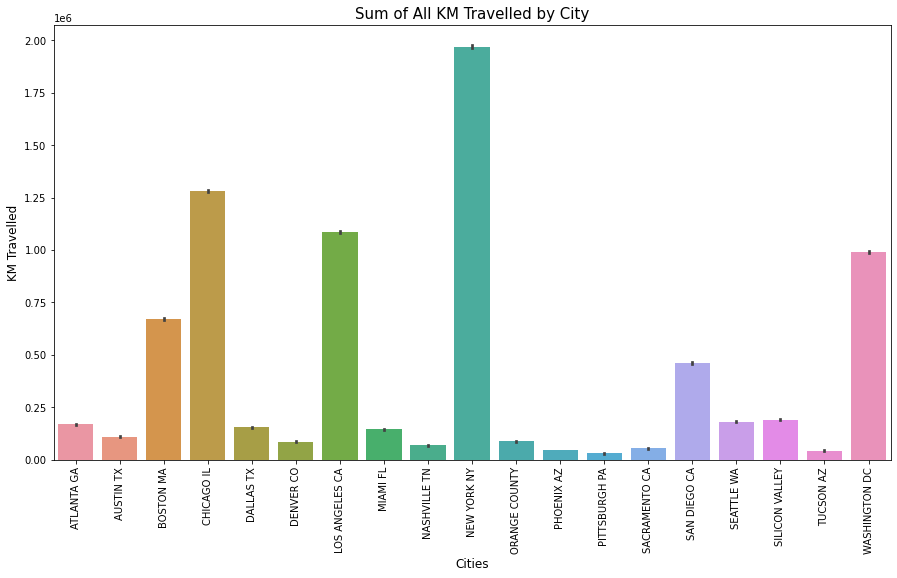

In [164]:
plt.figure(figsize = (15, 8))
sns.barplot('City', 'KM_Travelled', data =datadf, estimator = np.sum)
plt.xticks(rotation=90)
plt.title( 'Sum of All KM Travelled by City', size = 15)
plt.xlabel("Cities", size = 12)
plt.ylabel('KM Travelled', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'KM Travelled')

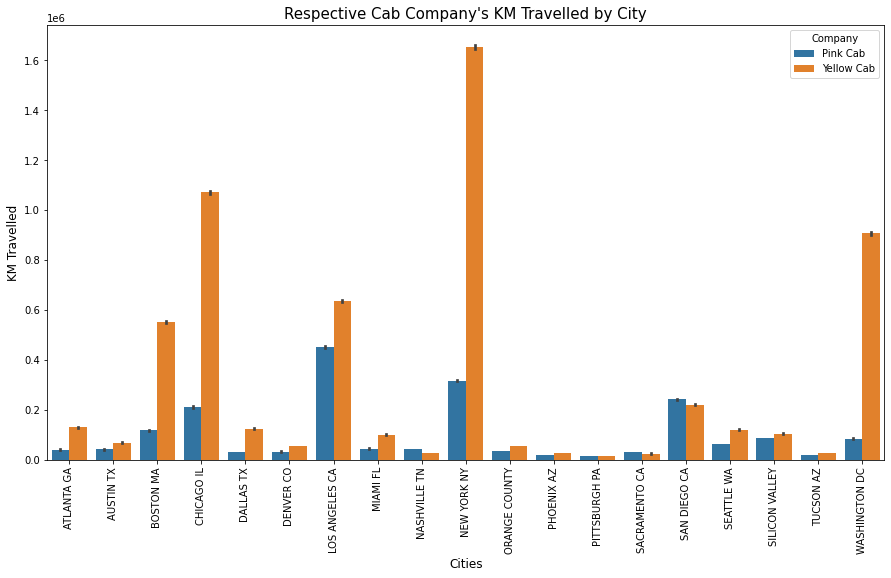

In [165]:
plt.figure(figsize = (15, 8))
sns.barplot('City', 'KM_Travelled', data =datadf, estimator = np.sum, hue = 'Company')
plt.xticks(rotation=90)
plt.title( "Respective Cab Company's KM Travelled by City", size = 15)
plt.xlabel("Cities", size = 12)
plt.ylabel('KM Travelled', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Users')

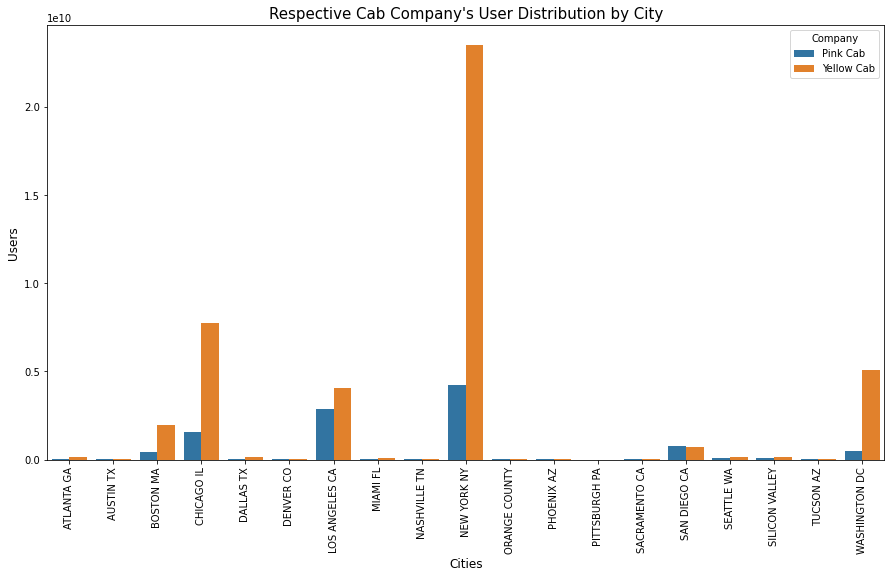

In [166]:
plt.figure(figsize = (15, 8))
sns.barplot('City', 'Users', data =datadf, estimator = np.sum, hue = 'Company')
plt.xticks(rotation=90)
plt.title( "Respective Cab Company's User Distribution by City", size = 15)
plt.xlabel("Cities", size = 12)
plt.ylabel('Users', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Mean Price Charged')

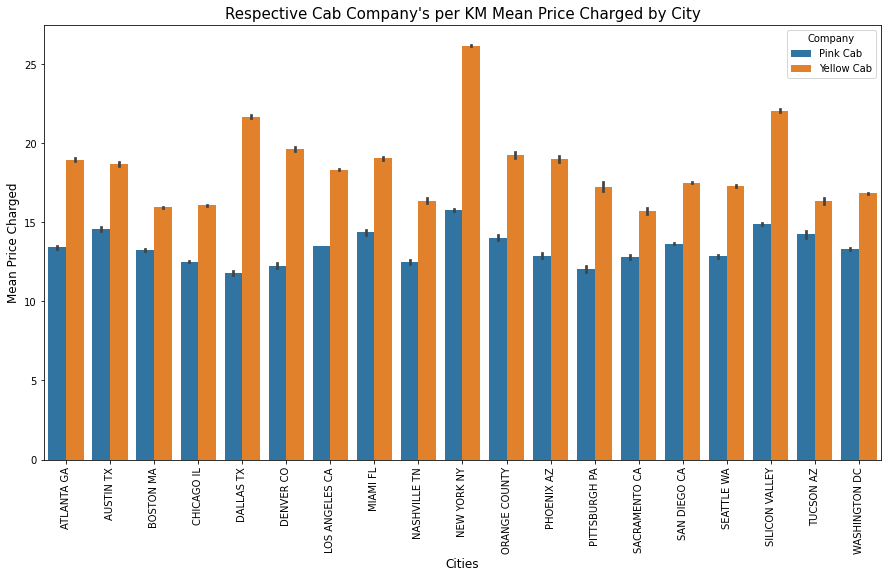

In [167]:
plt.figure(figsize = (15, 8))
sns.barplot('City', 'Price_Ch_PerKM', data =datadf, estimator = np.mean, hue = 'Company')
plt.xticks(rotation=90)
plt.title( "Respective Cab Company's per KM Mean Price Charged by City", size = 15)
plt.xlabel("Cities", size = 12)
plt.ylabel('Mean Price Charged', size = 12)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Profit')

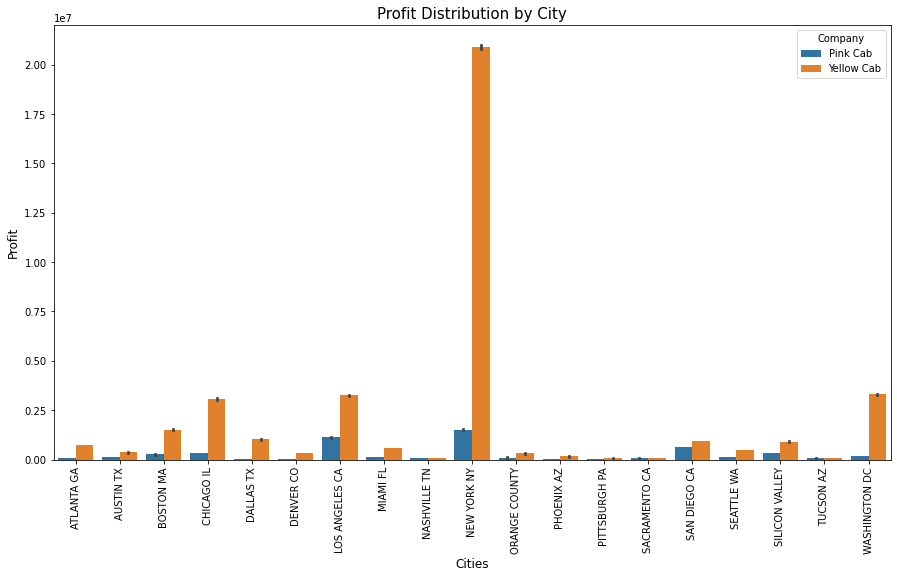

In [168]:
plt.figure(figsize = (15, 8))
sns.barplot('City', 'Profit', data =datadf, estimator = np.sum, hue = 'Company')
plt.title( "Profit Distribution by City", size = 15)
plt.xticks(rotation=90)
plt.xlabel("Cities", size = 12)
plt.ylabel('Profit', size = 12)

In [169]:
datadf.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Customer_ID',
       'Payment_Mode', 'Profit', 'Price_Ch_PerKM', 'Gender', 'Age', 'Income',
       'Population', 'Users'],
      dtype='object')

In [170]:
Yellowreturn = datadf[datadf['Company'] == 'Yellow Cab']['Customer_ID'].value_counts().to_frame()
Pinkreturn =  datadf[datadf['Company'] == 'Pink Cab']['Customer_ID'].value_counts().to_frame()

In [171]:
Yellowreturn['Customer_ID'] = np.where(Yellowreturn['Customer_ID'] > 1, 1, 0)
Pinkreturn['Customer_ID'] = np.where(Pinkreturn['Customer_ID'] > 1, 1, 0)

Text(0.5, 1.0, 'Yellow Cab Returning and One-Time Customers')

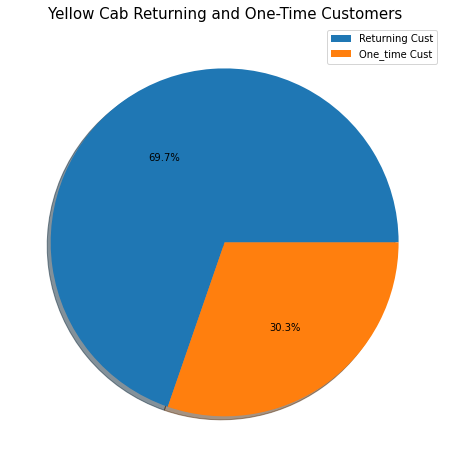

In [172]:
plt.figure(figsize = (15, 8))
legend = ["Returning Cust", "One_time Cust"]
plt.pie(Yellowreturn.value_counts(), autopct='%1.1f%%',  shadow = True)
plt.legend(legend, loc ='best')
plt.title( 'Yellow Cab Returning and One-Time Customers', size = 15)

Text(0.5, 1.0, 'Pink Cab Returning and One-Time Customers')

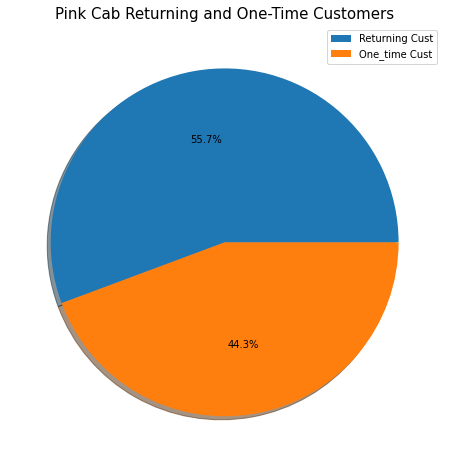

In [173]:
plt.figure(figsize = (15, 8))
legend = ["Returning Cust", "One_time Cust"]
plt.pie(Pinkreturn.value_counts(), autopct='%1.1f%%',  shadow = True)
plt.legend(legend, loc ='best')
plt.title( 'Pink Cab Returning and One-Time Customers', size = 15)

Text(0.5, 1.0, 'Cab Companies Share of Total KM Travelled')

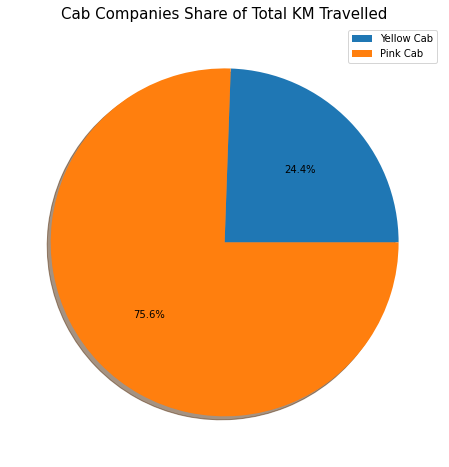

In [174]:
plt.figure(figsize = (15, 8))
legend = ["Yellow Cab", "Pink Cab"]
plt.pie(datadf.groupby('Company')['KM_Travelled'].sum(), autopct='%1.1f%%',  shadow = True)
plt.legend(legend, loc ='best')
plt.title( 'Cab Companies Share of Total KM Travelled', size = 15)

In [175]:
datadf.groupby('Company')['Users'].sum()

Company
Pink Cab      10637545967
Yellow Cab    43790218386
Name: Users, dtype: int64

Text(0.5, 1.0, 'Cab Companies Share of Total User')

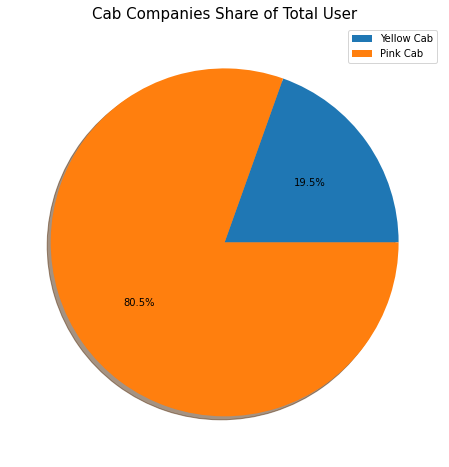

In [176]:
plt.figure(figsize = (15, 8))
legend = ["Yellow Cab", "Pink Cab"]
plt.pie(datadf.groupby('Company')['Users'].sum(), autopct='%1.1f%%',  shadow = True)
plt.legend(legend, loc ='best')
plt.title( 'Cab Companies Share of Total User', size = 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Total Number of Customers per Cab Company')

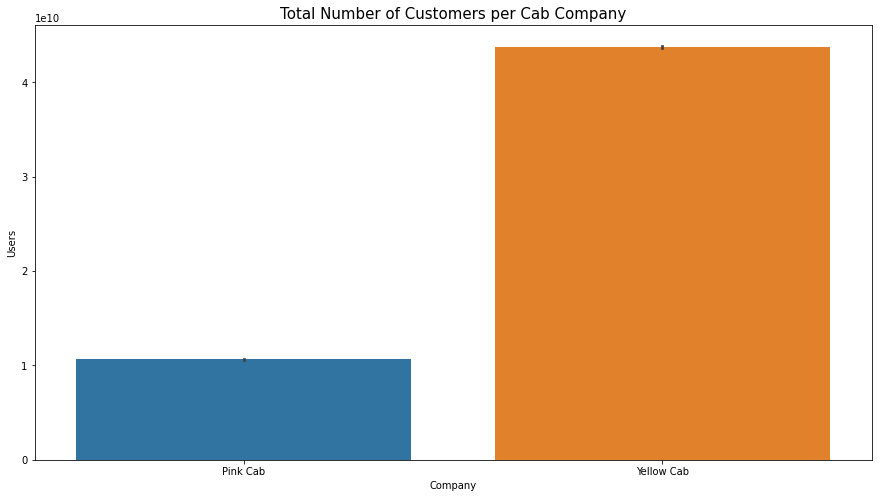

In [177]:
plt.figure(figsize = (15,8))
sns.barplot('Company', 'Users', data = datadf,estimator = np.sum)
plt.title('Total Number of Customers per Cab Company', size = 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sum of Profit per Cab Company')

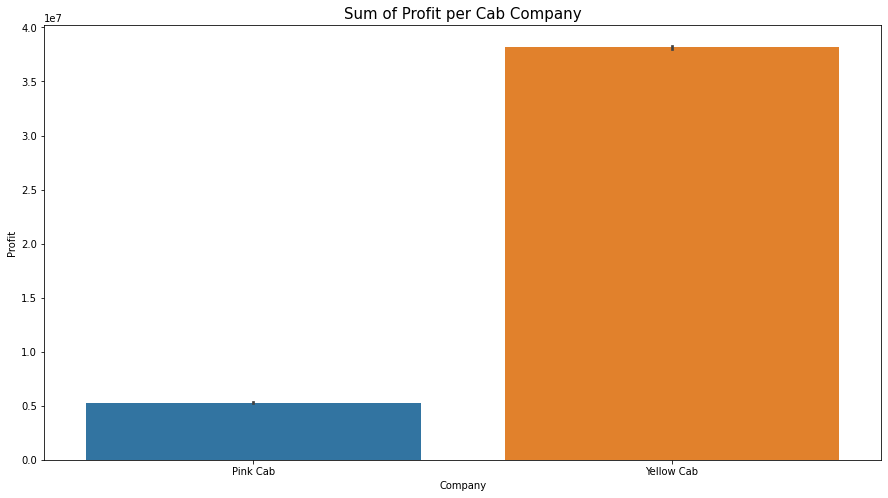

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 8))
ax = sns.barplot('Company', 'Profit', data = datadf , estimator = np.sum)
plt.title('Sum of Profit per Cab Company', size = 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mean Profit per Cab Company')

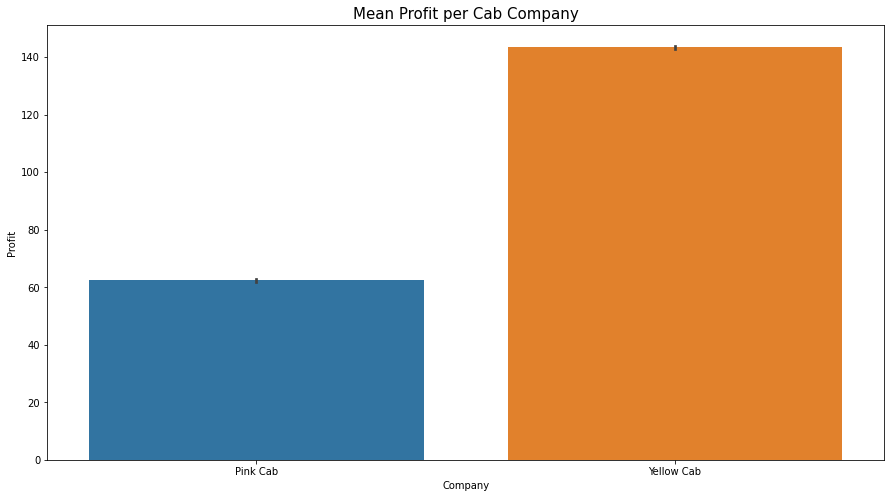

In [179]:
plt.figure(figsize = (15, 8))
sns.barplot('Company', 'Profit', data = datadf , estimator = np.mean)
plt.title( 'Mean Profit per Cab Company', size = 15)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Profit Distribution Variance per Cab Company')

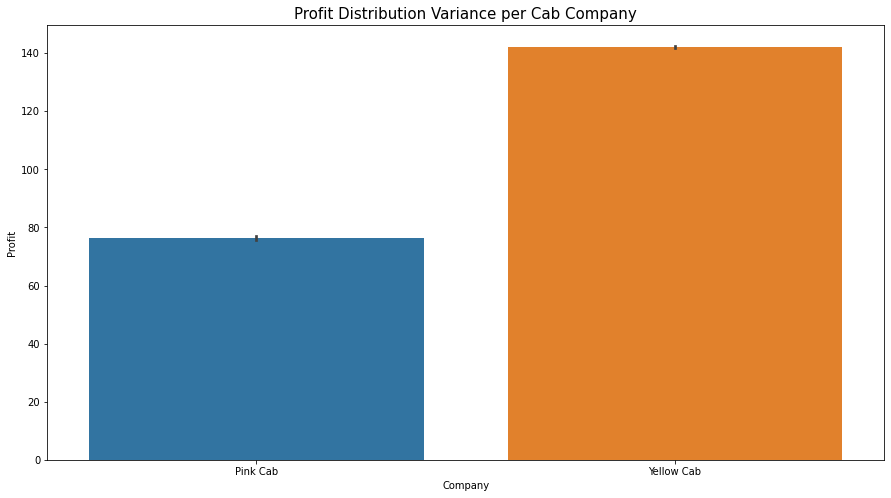

In [180]:
plt.figure(figsize = (15, 8))
sns.barplot('Company', 'Profit', data = datadf , estimator = np.std)
plt.title( 'Profit Distribution Variance per Cab Company', size = 15)

In [181]:
datadf.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Customer_ID',
       'Payment_Mode', 'Profit', 'Price_Ch_PerKM', 'Gender', 'Age', 'Income',
       'Population', 'Users'],
      dtype='object')

In [185]:
datadf.groupby('Company')['Price_Ch_PerKM'].max()

Company
Pink Cab      36.276233
Yellow Cab    36.395876
Name: Price_Ch_PerKM, dtype: float64

### Anova analysis for variables KM_travelled, Company and City in Cab data 

In [186]:
PinkCab_df = datadf[datadf['Company'] == 'Pink Cab']
YellowCab_df = datadf[datadf['Company'] == 'Yellow Cab']

In [187]:
PinkCab_df.columns
YellowCab_df.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Customer_ID',
       'Payment_Mode', 'Profit', 'Price_Ch_PerKM', 'Gender', 'Age', 'Income',
       'Population', 'Users'],
      dtype='object')

In [188]:
yelcabmod2 = ols('KM_Travelled~City+Gender + Age + Payment_Mode+ Month', data = YellowCab_df).fit()
yelcabaov2 = sm.stats.anova_lm(yelcabmod2, type =2 )
print(yelcabaov2)

                    df        sum_sq      mean_sq          F         PR(>F)
City              18.0  9.774106e+04  5430.058777  37.237796  1.704644e-130
Gender             1.0  1.915868e+02   191.586801   1.313848   2.517002e-01
Payment_Mode       1.0  2.889139e+00     2.889139   0.019813   8.880610e-01
Age                1.0  1.428405e+01    14.284047   0.097956   7.542968e-01
Month              1.0  9.911650e+03  9911.650454  67.971275   1.666375e-16
Residual      266064.0  3.879776e+07   145.821165        NaN            NaN


In [192]:
yelcabmod3 = ols('Users~City+Gender + Age + Payment_Mode+ Month', data = YellowCab_df).fit()
yelcabaov3 = sm.stats.anova_lm(yelcabmod2, type =2 )
print(yelcabaov3)

                    df        sum_sq      mean_sq          F         PR(>F)
City              18.0  9.774106e+04  5430.058777  37.237796  1.704644e-130
Gender             1.0  1.915868e+02   191.586801   1.313848   2.517002e-01
Payment_Mode       1.0  2.889139e+00     2.889139   0.019813   8.880610e-01
Age                1.0  1.428405e+01    14.284047   0.097956   7.542968e-01
Month              1.0  9.911650e+03  9911.650454  67.971275   1.666375e-16
Residual      266064.0  3.879776e+07   145.821165        NaN            NaN


In [190]:
yelcabmod4 = ols('Profit~City+Gender + Age + Payment_Mode+ Month', data = YellowCab_df).fit()
yelcabaov4 = sm.stats.anova_lm(yelcabmod2, type =2 )
print(yelcabaov4)

                    df        sum_sq      mean_sq          F         PR(>F)
City              18.0  9.774106e+04  5430.058777  37.237796  1.704644e-130
Gender             1.0  1.915868e+02   191.586801   1.313848   2.517002e-01
Payment_Mode       1.0  2.889139e+00     2.889139   0.019813   8.880610e-01
Age                1.0  1.428405e+01    14.284047   0.097956   7.542968e-01
Month              1.0  9.911650e+03  9911.650454  67.971275   1.666375e-16
Residual      266064.0  3.879776e+07   145.821165        NaN            NaN


In [189]:
pinkcabmod2 = ols('KM_Travelled~City+Gender + Age + Payment_Mode+ Month', data = PinkCab_df).fit()
pinkcabaov2 = sm.stats.anova_lm(pinkcabmod2, type =2 )
print(pinkcabaov2)

                   df        sum_sq     mean_sq         F    PR(>F)
City             18.0  2.842911e+03  157.939507  1.056014  0.391336
Gender            1.0  5.158323e+01   51.583230  0.344895  0.557019
Payment_Mode      1.0  1.238437e+02  123.843709  0.828043  0.362842
Age               1.0  2.187628e+02  218.762752  1.462690  0.226506
Month             1.0  6.411699e+01   64.116992  0.428698  0.512630
Residual      84657.0  1.266147e+07  149.561971       NaN       NaN


In [193]:
pinkcabmod3 = ols('Users~City+Gender + Age + Payment_Mode+ Month', data = PinkCab_df).fit()
pinkcabaov3 = sm.stats.anova_lm(pinkcabmod2, type =2 )
print(pinkcabaov3)

                   df        sum_sq     mean_sq         F    PR(>F)
City             18.0  2.842911e+03  157.939507  1.056014  0.391336
Gender            1.0  5.158323e+01   51.583230  0.344895  0.557019
Payment_Mode      1.0  1.238437e+02  123.843709  0.828043  0.362842
Age               1.0  2.187628e+02  218.762752  1.462690  0.226506
Month             1.0  6.411699e+01   64.116992  0.428698  0.512630
Residual      84657.0  1.266147e+07  149.561971       NaN       NaN


In [191]:
pinkcabmod4 = ols('Profit~City+Gender + Age + Payment_Mode+ Month', data = PinkCab_df).fit()
pinkcabaov4 = sm.stats.anova_lm(pinkcabmod2, type =2 )
print(pinkcabaov4)

                   df        sum_sq     mean_sq         F    PR(>F)
City             18.0  2.842911e+03  157.939507  1.056014  0.391336
Gender            1.0  5.158323e+01   51.583230  0.344895  0.557019
Payment_Mode      1.0  1.238437e+02  123.843709  0.828043  0.362842
Age               1.0  2.187628e+02  218.762752  1.462690  0.226506
Month             1.0  6.411699e+01   64.116992  0.428698  0.512630
Residual      84657.0  1.266147e+07  149.561971       NaN       NaN


### Anova analysis for variables Cost of Trip, Company and City in Cab data 

In [194]:
pinkcabmod3 = ols('Profit~City+Gender + Payment_Mode', data = PinkCab_df).fit()
pinkcabaov3 = sm.stats.anova_lm(pinkcabmod3, type =2 )
print(pinkcabaov3)

                   df        sum_sq       mean_sq           F    PR(>F)
City             18.0  5.103976e+07  2.835542e+06  542.561778  0.000000
Gender            1.0  8.945916e+02  8.945916e+02    0.171174  0.679072
Payment_Mode      1.0  9.247364e+02  9.247364e+02    0.176942  0.674016
Residual      84659.0  4.424458e+08  5.226211e+03         NaN       NaN


In [ ]:
yelcabmod3 = ols('Profit~City+Gender + Payment_Mode', data = YellowCab_df).fit()
yelcabaov3 = sm.stats.anova_lm(pinkcabmod3, type =2 )
print(yelcabaov3)

                   df        sum_sq       mean_sq           F    PR(>F)
City             18.0  5.105824e+07  2.836569e+06  542.191043  0.000000
Gender            1.0  7.003657e+02  7.003657e+02    0.133870  0.714453
Payment_Mode      1.0  1.097477e+03  1.097477e+03    0.209775  0.646945
Residual      84661.0  4.429191e+08  5.231678e+03         NaN       NaN


In [98]:
datadf.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip', 'Year', 'Month', 'Customer_ID',
       'Payment_Mode', 'Profit', 'Gender', 'Age', 'Income', 'Population',
       'Users'],
      dtype='object')

From the result above, it is clear that the Yellow Cab Company has more Users, travelled more distance and made more profit that the Pink Cab Company. However, the Standard Deviation shows that the Yellow Cab company has higher profit variation compared to the Pink Cab company. It can be inferred that even though the Yellow Cab Company was involved in more activities and made more profit than teh Pink Cab, the variation in its profit is higher hence higher volatility and risk. A slight change in the market condition will likely affect the Yellow Cab company than the pink Cab company 
Based on these, it can be inferred that if the investor is ready to take risk, the Yellow Cab company would be the best to invest in considering the higher profit. On the other side, if the investor is not ready to much risk, the Pink Cab company should be invested in despite it low profit yield.  